### Solutions 1: Basic concepts on random variables and Probability, GEO4310

Author: Bikas C. Bhattarai

Date: August, 2015

##### Part I: Daily precipitation in Uppsala(1981-1991)

Observed daily precipitation in Uppsala (1981 -1991) is available in the file P_Uppsala.dat (columns are year, month, day and p[mm/day])


In [187]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [213]:
# Reading the data precipitation data table and assigning the respective headers to each columns
precip_daily = pd.read_table('P_Uppsala.dat', header=None, names=['year', 'month', 'day', 'prec'])
prec = precip_daily['prec']
Cv = prec.std()/prec.mean()
import scipy.stats as stats
stats.skew(prec)


8.150970878096675

#### Question No 1. From monthly data (file P_uppmonth1.dat): compute for each month (column wise) mean, median, mode, standard deviation, coefficient of variation, minimum and maximum and plot these values to show the annual variation.

In [186]:
precip_mon = pd.read_table('P_uppmonth1.dat')

# To calculate the yearly sum of the precipitation
annual_sum= precip_mon.set_index('year').sum(axis=1) 

# Define the dataframe and drop the first column
mon_df = pd.DataFrame(precip_mon, columns = precip_mon.columns[1:])
mon_df.head(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,32,26,62,22,23,98,80,163,13,122,144,109
1,42,30,54,50,192,37,52,77,48,46,74,52
2,78,10,107,46,36,105,80,25,188,58,36,78


**Calculating monthly statistics from monthly data**

In [44]:
# Calculating monthly mean
mon_mean = mon_df.mean(axis=0).round(0)
# Calculating monthly median
mon_median = mon_df.median(axis = 0)
# Calculating monthly maximum precipitation
mon_max = mon_df.max(axis = 0)
# Calculating monthly minimum precipitation
mon_min = mon_df.min(axis=0)

In [99]:
# merge different statistics in to one matrix
all_stats = pd.concat([mon_mean,mon_median,mon_min,mon_max], axis = 1,)
# Defining dataframe to the matrix 
all_stats = pd.DataFrame(all_stats )
# Assigning the respective columns name 
all_stats.columns = ['mon_mean','mon_median','mon_min','mon_max']
#displaying the dataframe as transpose position
all_stats.T

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
mon_mean,54,34,53,38,57,67,81,103,79,66,62,61
mon_median,59,29,51,46,38,51,80,77,65,58,54,59
mon_min,9,10,22,4,23,25,11,25,13,27,36,24
mon_max,83,79,107,69,192,142,128,234,188,122,144,109


**Making plot for this statistics**

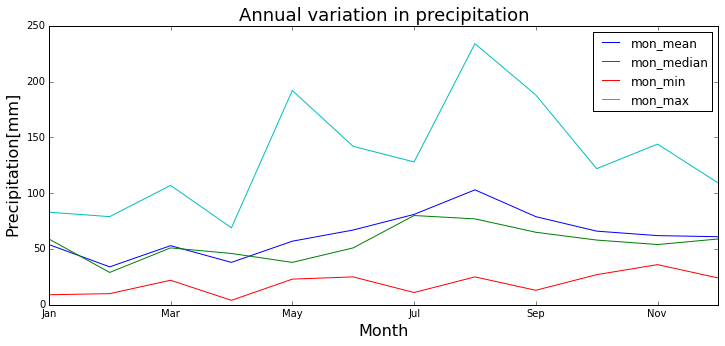

In [183]:
all_stats['Jan':'Dec'].plot(figsize=(12,5))
plt.xlabel('Month', size = 16) 
plt.ylabel('Precipitation[mm]', size = 16) 
plt.title('Annual variation in precipitation', size = 18) 
plt.legend()
plt.show()

**Conclusion:** From the above table and graph, maximum and mean precipitation observed in August while minimun precipitationin observed in April. So from this statistics we can say that, April is the driest month and August is the most wettest month during this observation preiod.

##### Calculating Monthly Mode

In [157]:
mon_mode = mon_df.mode(axis = 0)
mon_mode

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,72,28,NaN,46,23,25,80,NaN,NaN,NaN,54,NaN
1,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74,NaN


**Conclusion:** From this table, November and Feburary are bimodal months because in Feburary and in November, the two numbers are frequently occured.

##### Monthly standard deviation

In [130]:
mon_std = pd.DataFrame(mon_df.std(axis=0).round(1))
#assigning column name
mon_std.columns = ['std']
# displaying data in transpose view
mon_std.T                      

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
std,24.7,20.5,22.4,20.1,48.9,38.9,34.3,66.1,57.3,30.5,29.6,24.3


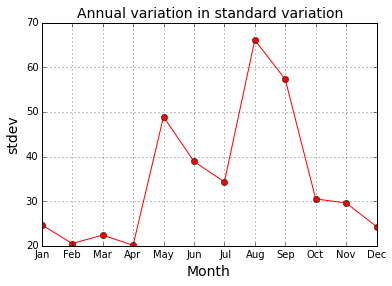

In [181]:
#Making plot for standard deviation
#Assigning x and y value for a plot
x = range(12)
y = mon_std['std']
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(x, my_xticks)
plt.plot(x, y, 'r-o')
plt.grid(True)
plt.title('Annual variation in standard variation',size = 14) 
plt.ylabel('stdev', size = 14) 
plt.xlabel('Month', size = 14)
plt.show()

**Conclusion:** Here, the monthly standard deviation for August is higher than all other months, indicating the higher variablility during this month. In Feburary and April, the standard deviation is low, indicating lower variation during these months.

##### Monthly coefficient of  variation

Another way to describe the variation of in a data by calculating the coefficient of variation. 

$C_v = \frac{s_x}{\bar{x}}$

Hence it is unit free quantity. It helps us to understand relative variability and is useful to compare variability within datasets having different mean values.

In [214]:
import scipy.stats as ss
mon_cv = pd.DataFrame(ss.variation(mon_df, axis=0).round(2))
#Assigninng column name
mon_cv.columns = ['C_v']
#Assigning index name
mon_cv.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#displaying data in transpose view
mon_cv.T 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
C_v,0.44,0.58,0.41,0.51,0.83,0.55,0.4,0.61,0.69,0.44,0.45,0.38


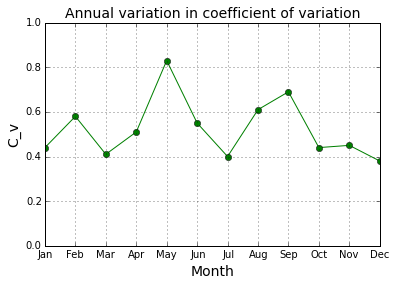

In [215]:
#Making plot for standard deviation
#Assigning x and y value for a plot
x = range(12)
y = mon_cv['C_v']
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(x, my_xticks)
plt.plot(x, y, 'g-o')
plt.grid(True)
plt.title('Annual variation in coefficient of variation',size = 14) 
plt.ylabel('C_v', size = 14) 
plt.ylim(0,1)
plt.xlabel('Month', size = 14)
plt.show()

**Conclusion:** Feburary and April, that had the lowest standard deviation, do not have the lowest coefficient of variation. This is because the these months are the driest months. August, the wettest month, had the highest standard deviation but has the third highest coefficient of variation. The two highest coefficients of variability are in May and September, indicating higher variability relative to the mean in those months.  

##### 1.2 Calculate the probability for daily precipitation that :

1) Equal zero 

2) More than zero

3) More than 10 mm and 

4) More than 10 mm for the days with precipitation.

##### 1. Equals to zero

Probability of daily precipitation that equal zero is found by divide the number of days with zero precipitation by total number of days in the period.


In [216]:
total_no_of_zero_events = sum(x==0 for x in precip_daily['prec'])
total_no_of_days_with_prec = sum(x>=0 for x in precip_daily['prec'])
probability_of_zero_events = (total_no_of_zero_events / total_no_of_days_with_prec*100)
print 'Probability = %.1f ' % (probability_of_zero_events)

Probability = 52.8 


Hence, the probability of daily precipitation that equals to zero events is 52.8%.

##### 2. More than zero

Probability of daily precipitation more than zero is calculated by divide the number of days with precipitation by total number of days in the period.

In [218]:
probability_more_than_zero = (sum(x>0 for x in precip_daily['prec'])/sum(x>=0 for x in precip_daily['prec']))*100

print 'Probability = %.1f ' % (probability_more_than_zero)

Probability = 47.2 


Probability of daily precipitation that equals to more than zero is 47.2 %.

or alternatively, since the probability of daily precipitation more than zero, and the probability of daily precipitation equal zero is mutually exclusive, the probability of daily precipitation more then zero is found by subtracting the probability of daily precipitation equal zero.

P(X>0) = 1-52.8

= 47.2

So the probability of daily precipitation that equals to more than zero is 47.2%.

##### 3. More than 10 mm

In [219]:
more_than_10 = (sum(x>10 for x in precip_daily['prec'])/sum(x>=0 for x in precip_daily['prec']))*100
print 'Probability = %.1f ' % (more_than_10)

Probability = 5.8 


Probability of daily precipitation that more than 10 mm is 5.8%.

Note: if you write x >= 10 then it will also count the value of 10 (i.e inclusive function and the value becomes   5.9497)

##### 4.  More than 10 mm for the day with precipitation

In [221]:
more_than_10_with_ppt = (sum(x>10 for x in precip_daily['prec'])/sum(x>0 for x in precip_daily['prec']))*100

print 'Probability = %.1f' % (more_than_10_with_ppt)

Probability = 12.2


Probability of daily precipitation that more than 10 mm for the day with precipitatio is 12.2%.

##### 1.3 From the daily data, calculate the maximum 1-day, 3-day and 5-day average rainfall amount, and state the date/period

##### One day maximum precipitation with date

In [222]:
odmax = precip_daily.sort(['prec'],ascending = False).head(1)
odmax

,year,month,day,prec
505,1982,5,21,136.6


Hence, the maximum 1-day rainfall amount in Uppsala between 1981 and 1991 is 136.6 on the 21.05.1982.

##### Maximum 3 day average rainfall 

In [224]:
df = pd.read_table('P_Uppsala.dat', sep='\s+', header = None, names = ['year','month','day','prec'])

In [225]:
df['mv']=pd.rolling_mean(df['prec'], 3)

df[df['mv']==df['mv'].max()]

,year,month,day,prec,mv
507,1982,5,23,5.6,47.4


Maximum 3-day rainfall amount in Uppsala is 47.4 mm  on 23.05.1982

##### Maximum 5 day average rainfall 

In [172]:
df['mv5']=pd.rolling_mean(df['prec'], 5)
df[df['mv5']==df['mv5'].max()]

,year,month,day,prec,mv,mv5
508,1982,5,24,6.4,4,29.72
509,1982,5,25,0.0,4,29.72


Maximum 5-day rainfall amount in Uppsala is 29.72 mm  happens in two different periods,  24.05.1982 and 25.05.1982

##### 1.4 length of the maximum dry-spell days and the maximum wet-spell days of daily rainfall

To calculate maximum dry-spell days according to month

In [229]:
df = pd.read_table('P_Uppsala.dat', sep='\s+', header = None, names = ['year','month','day','prec'])

def func(group): return (group.prec != 0).astype(int).cumsum().value_counts().values[0] - 1 

df1= df.groupby(['year','month']).apply(func)
df1.max() 

22

In [230]:
df1.idxmax()

(1981, 5)

Hence, the maximum dry-spell is 22 in May, 1981

Note: There might be continuous longer dry-spell periods starting from one month and ending in next month, in this case we have to change the code slightly

In [233]:
df2= df.groupby(['year']).apply(func)
df2 = pd.DataFrame(df2)
df2.T

year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
0,22,15,22,12,14,9,15,11,22,19,12


Hence in 1981, 1983 and 1989 have the same dry-spell of 22.

##### To calculate maximum wet-spell days according to month

In [237]:
def func(group): 
        return (group.prec == 0).astype(int).cumsum()[group.prec != 0].value_counts().iloc[0] 

df2= df.groupby(['year']).apply(func)
df2 = pd.DataFrame(df2)
df2.T

year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991
0,9,10,16,14,13,13,18,23,9,10,12


[Note: when you group by month also then you will get different result because, the rainy days starting form one month and ending in next month so the result is different.]

Hence, Maximum wet-spell days in Uppsala from 1981 to 1991 is 23 on 1988.

### part II

In this section we will work on Tahoe lake data.
Read the data which is provided

In [177]:
tahoe = pd.read_table('Tahoe.dat',sep='\s+', header = None, names = ['depth','nan'])


Define dataframe

In [178]:
df= pd.DataFrame(tahoe['depth'])


Note: If you want to plot regular histogram then just give the command plt.hist(df['depth'])


##### Plot relative histogram

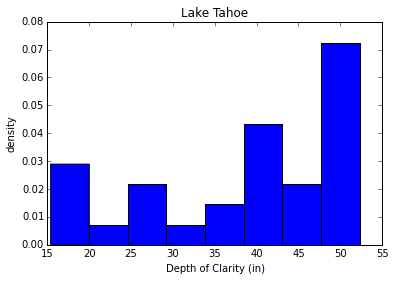

In [179]:
plt.hist(df['depth'], bins= 8, normed = True) 
plt.ylabel('density')
plt.xlabel('Depth of Clarity (in)')
plt.title('Lake Tahoe')
plt.show()

##### Plot cumulative relative frequency

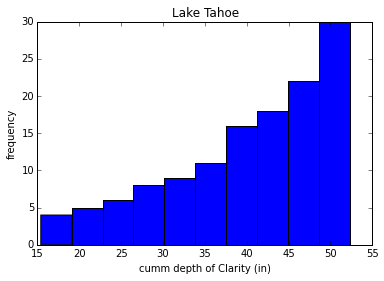

In [180]:
plt.hist(df['depth'], bins= 10,  cumulative = True)
plt.xlabel('cumm depth of Clarity (in)')
plt.ylabel('frequency')
plt.title('Lake Tahoe')
plt.ylabel('frequency')

##### Calculate the probability that the depth of lake more than 40 inch.

In [181]:
prob_more_than_40 = (sum(x>40 for x in df['depth'])/sum(x>=0 for x in df['depth']))*100

print 'Probability that the depth of lake is more than 40 inch = %.1f '  % (prob_more_than_40)

Probability that the depth of lake is more than 40 inch = 50.0 


##### Calculate the probability that the depth of lake in between 15 to 40 inch.

In [182]:
Probability_betwee_15_30 = (df['depth'].between(15,30).sum()/(df['depth'].count()))*100

print 'Probability that the depth of lake is in between 13 to 40 inch = %.2f '  % (Probability_betwee_15_30)

Probability that the depth of lake is in between 13 to 40 inch = 26.67 


### Part III 

##### The frequency function for a continuous stochastic variable is shown below. Solve the problems analytically.

$$
f(x) = \left\{
        \begin{array}{ll}
            cx^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$

1. Find the value for c so that f(x) becomes a density function. 
2. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)
3. Find the distribution function, F(x)
4. Find the median
5. Find the mode
6. Calculate the expectation, E(x)
7. Calculate the variance, var(x)

#### 1. Find the value for c so that f(x) becomes a density function

To find the probability density function f d (x), one has to integrate f (x) from 0 and 1. This integral is equal to 1 as it shall be a density function.

$\int_{-\infty }^{\infty }f_{d}(dt)$ = $\int_{0}^{1} ct²(dt)$ = 1


= $ \frac{ct³}{3}|_{0}^{1} $

= $ \frac{1³c}{3}$ - $ \frac{0³c}{3}$ = 1

c = 3

That means, the density function is



$$
f(x) = \left\{
        \begin{array}{ll}
            3x^2 & \quad 0 < x < 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
$$



##### 2. Calculate Prob(x < 0), Prob(x = 0.5), Prob(x > 1), Prob(0<=x<=0.5) and Prob(0<x< 0.5)

P rob(x < 0) = 0

P rob(x = 0.5) = F (0.5) − F (0.5) = 0

P rob(x > 1) = 0

P (0 ≤ x ≤ 0.5) = F (0.5) − F (0) = 0.125

P (0 < x < 0.5) = F (0.5) − F (0) = 0.125

##### 3. Find the distribution function, F(x)

The distribution function is defined as the integral of the density function.

$ F(x) =  F(x) = x³ for 0<x<1 $

##### 4. find the median

The median for a continuous data is defined as

$\int_{-\infty }^{\mu_{md} }f_{x}(dx)$ = $\int_{\mu_{md}}^{\infty} f_{x}(dx)$ = 0.5

which means, the median $\mu_{md}$ is that value, which divides the density function into two parts having equal areas of 2 1 each. For the given function, one obtains:

$\int_{0 }^{\mu_{md} }3x²(dx)$ = $\int_{\mu_{md}}^{1} 3x²(dx)$ = 0.5

$ x³|_{\mu_{md}}^{1} $ = 0.5

1³ - $\mu_{md}^{3}$ = 0.5 
 
$\mu_{md}$ = $\sqrt[3]{1-0.5}$
 
 
$\mu_{md}$ = 0.7937

Therefore the median of the analysed density function is $\mu_{md}$ = 0.7937.

##### 5. find the mode

The function has no mode. For continuous variables the mode is defined as the maximum of the function. As this function has a discontinuity at the point, where it seems to have its maximum (at x = 1), one cannot calculate the derivation at that specific point. That means, $ \frac{df(1)}{dx}$, the first derivation, is not defined.

##### 6. Calculate the expectation, E(x)

$ E(X) = \int_{0 }^{1} x f(x)dx =  \int_{0 }^{1} x 3x² dx   =  \frac{3}{4}$

##### 7. Calculate the variance, var(x)

$ V(X) = E(X²) − (EX)²$

First, calculating E(X²)

$ E(X²) = \int_{0 }^{1} x²  3x² dx  = \int_{0 }^{1} 3x⁴ dx $

$ \left |\frac{3x⁵}{5}  \right |_{0}^{1} = \frac{3}{5}$ 

Then we can calculate $V(X)$

$V(X) = \frac{3}{5} -(\frac{3}{5})^2 $

$V(X)= \frac{3}{80}$